# Los Angeles Chinatown Group Midterm

**Group Members:**
- Alyssa Suzukawa
- Brian Kohaya
- Clara Fuchshuber
- Dom Ong
- Jiaqi Li

## **Introduction: Los Angeles Chinatown**

<div class="alert alert-info">
Example markdown for your section! Copy + paste this cell to make a callout!

<div class="alert alert-info">
Start by importing modules to gain access to their functions for data analysis.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import plotly.express as px
import plotly.io as pio

## **Physical Changes in Chinatown**

### Parcel Use Changes

### Parcel Value Changes

Over the course of the early 2000s to mid 2010s, new transit and land use policies change the speculative pricing of Chinatown's historic neighborhood. The passage of Cornfield Arroyo Seco Specific Plan (CASP) in 2013 aligns with a steady increase in Chinatown's land value and total parcel value, with price hikes continuing after the adoption of the Transit Oriented Communities (TOC) Program in 2016. This lays the foundation for patterns of displacement, as increasing parcel prices lead to rent hikes and a higher cost of living that can push out vulnerable low-income populations. The LA Assessor's office defines land value as the cost of a parcel disregarding any structure built on it, while total value includes both land value and the value of existing structures. 

In [2]:
# Create an array of all years of assessor data using for loop

parcel_dataframes = []

for year in range(2006,2022):
    parcel_data_filepath = "Midterm Data/Assessor_Parcels_Data_" + str(year) + "_TRA.geojson"
    parcel_dataframe_raw = gpd.read_file(parcel_data_filepath)
    columns_to_keep = ['TotalValue','geometry','LandValue','YearBuilt']
    parcel_dataframe = parcel_dataframe_raw[columns_to_keep].copy()
    parcel_dataframe['Year'] = year
    parcel_dataframes.append(parcel_dataframe)

print(parcel_dataframes[0].info())

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TotalValue  1095 non-null   float64 
 1   geometry    1095 non-null   geometry
 2   LandValue   1095 non-null   float64 
 3   YearBuilt   1095 non-null   int64   
 4   Year        1095 non-null   int64   
dtypes: float64(2), geometry(1), int64(2)
memory usage: 42.9 KB
None


In [3]:
# Ensure that the new column we created does track the data by year
print(parcel_dataframes[15].sample(5))

     TotalValue                                           geometry  LandValue  \
434    517451.0  POLYGON Z ((-118.24486 34.06916 0.00000, -118....   265905.0   
453   1940758.0  POLYGON Z ((-118.24036 34.06547 0.00000, -118....   926930.0   
393    175933.0  POLYGON Z ((-118.23199 34.05782 0.00000, -118....    82645.0   
506         0.0  POLYGON Z ((-118.23260 34.06105 0.00000, -118....        0.0   
994    208188.0  POLYGON Z ((-118.24447 34.06694 0.00000, -118....   104094.0   

     YearBuilt  Year  
434       2018  2021  
453       1980  2021  
393       1958  2021  
506       1970  2021  
994       1980  2021  


In [4]:
# Combined all my dataframes into one big one
assessor_parcels_all = pd.concat(parcel_dataframes)

In [5]:
# Create a function that will sort each totalvalue row item into a new bucket, 0-4
def bucket_total_value(total_value):
    if (total_value < 50000):
        return "Less than 500k"
    if (total_value < 100000):
        return "500k to 999k"
    if (total_value < 300000):
        return "1mil to 3mil"
    if (total_value < 500000):
        return "3mil to 5mil"
    if (total_value < 76000000):
        return "5mil or More"

In [6]:
# Create new column totalvaluebracket to capture the function outputs
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValue'].map(bucket_total_value)
assessor_parcels_all['TotalValueBracket'] = assessor_parcels_all['TotalValueBracket'].astype("string")

In [7]:
# Now create a count column for each of the brackets
total_value_grouped = assessor_parcels_all.value_counts(['Year','TotalValueBracket']).reset_index(name='count')
total_value_grouped

Year TotalValueBracket  count
0   2021      5mil or More    496
1   2020      5mil or More    484
2   2019      5mil or More    456
3   2006      1mil to 3mil    437
4   2010      1mil to 3mil    428
..   ...               ...    ...
75  2017      500k to 999k     75
76  2018      500k to 999k     64
77  2019      500k to 999k     55
78  2020      500k to 999k     50
79  2021      500k to 999k     50

[80 rows x 3 columns]

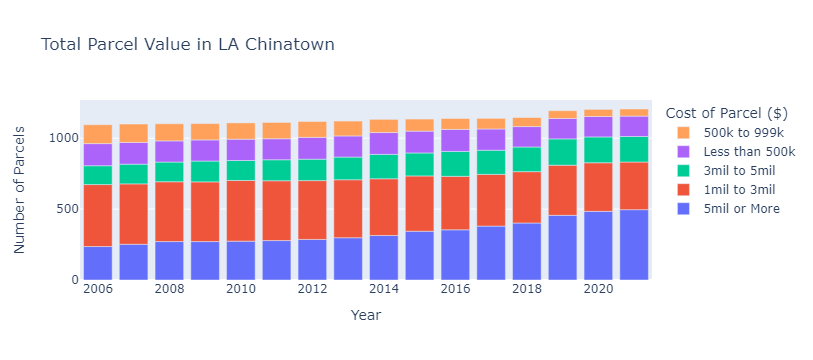

In [8]:
# Plot the counts
fig = px.bar(total_value_grouped,
             x='Year',
             y='count',
             color='TotalValueBracket',
             title='Total Parcel Value in LA Chinatown',
             labels = {
                 'Year':'Year',
                 'count':'Number of Parcels',
                 'TotalValueBracket':'Cost of Parcel ($)'
                    })
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [9]:
assessor_parcels_all.LandValue.describe()

count    1.815400e+04
mean     4.240045e+05
std      1.249256e+06
min      0.000000e+00
25%      4.178600e+04
50%      1.049220e+05
75%      3.188958e+05
max      3.090465e+07
Name: LandValue, dtype: float64

In [10]:
# Going to do the same thing with parcel land value
# Create a function that will sort each landvalue row item into a new bucket, 0-4
def bucket_land_value(land_value):
    if (land_value < 50000):
        return "Less than 500k"
    if (land_value < 100000):
        return "500k to 999k"
    if (land_value < 300000):
        return "1mil to 3mil"
    if (land_value < 500000):
        return "3mil to 5mil"
    if (land_value < 50000000):
        return "Greater than 5mil"

In [11]:
# Create new column totalvaluebracket to capture the function outputs
assessor_parcels_all['LandValueBracket'] = assessor_parcels_all['LandValue'].map(bucket_land_value)
assessor_parcels_all['LandValueBracket'] = assessor_parcels_all['LandValueBracket'].astype("string")

In [12]:
# Now create a count column for each of the brackets
land_value_grouped = assessor_parcels_all.value_counts(['Year','LandValueBracket']).reset_index(name='count')
land_value_grouped

Year LandValueBracket  count
0   2006   Less than 500k    407
1   2007   Less than 500k    400
2   2008   Less than 500k    390
3   2009   Less than 500k    382
4   2010   Less than 500k    381
..   ...              ...    ...
75  2008     3mil to 5mil     90
76  2011     3mil to 5mil     89
77  2010     3mil to 5mil     86
78  2007     3mil to 5mil     81
79  2006     3mil to 5mil     74

[80 rows x 3 columns]

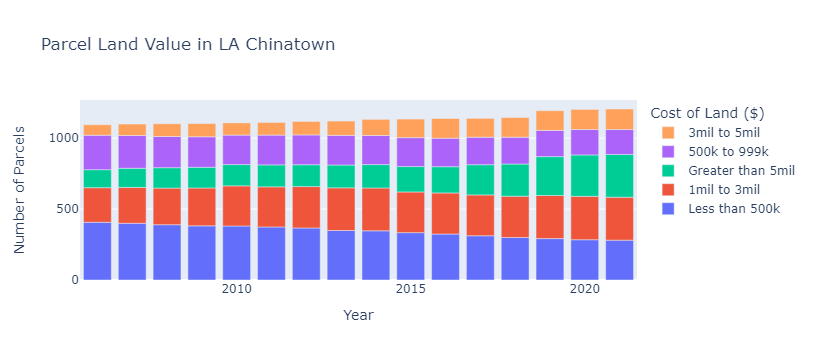

In [13]:
# Plot the counts
fig = px.bar(land_value_grouped,
             x='Year',
             y='count',
             color='LandValueBracket',
             title='Parcel Land Value in LA Chinatown',
             labels = {
                 'Year':'Year',
                 'count':'Number of Parcels',
                 'LandValueBracket':'Cost of Land ($)'
                    })
fig.update_layout(legend_traceorder="reversed")
fig.show()

## **Demographic Changes in Chinatown**

### Median Household Income Changes (Adjusted to 2021 US Dollars)

### Download dataset using Social Explorer

At the Los Angeles County Census Block Group Level:
- ACS 2007-2011
- ACS 2012-2016
- ACS 2017-2021

#### Importing the Data

In [14]:
# Read and add ACS Median Household Income from 2007 to 2021
medinc_2017_2021 = pd.read_csv('Midterm Data/ACS 2021 5Y - Median Household Income.csv',
                              dtype = {
                                  'Geo_FIPS':str,
                                  'Geo_STATE':str,
                                  'Geo_COUNTY':str })

medinc_2012_2016 = pd.read_csv('Midterm Data/ACS 2016 5Y - Median Household Income (2021 Adjusted).csv',
                              dtype = {
                                  'Geo_FIPS':str,
                                  'Geo_STATE':str,
                                  'Geo_COUNTY':str })

medinc_2007_2011 = pd.read_csv('Midterm Data/ACS 2011 5Y - Median Household Income (2021 Adjusted).csv',
                              dtype = {
                                  'Geo_FIPS':str,
                                  'Geo_STATE':str,
                                  'Geo_COUNTY':str })

#### Cleaning the Data

In [15]:
# List columns to keep

columns_to_keep = ['Geo_FIPS',
                   'SE_A14006_001']

# Update new dataframe to includes desired columns
medinc_2017_2021 = medinc_2017_2021[columns_to_keep]
medinc_2012_2016 = medinc_2012_2016[columns_to_keep]
medinc_2007_2011 = medinc_2007_2011[columns_to_keep]

# Rename column names
medinc_2017_2021.columns = ['GEOID', '2017-2021 Median Houshold Income']
medinc_2012_2016.columns = ['GEOID', '2012-2016 Median Houshold Income']
medinc_2007_2011.columns = ['GEOID', '2007-2011 Median Houshold Income']

In [16]:
# Checking to ensure that the dataframes have been updated correctly
medinc_2007_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 2 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GEOID                             6425 non-null   object 
 1   2007-2011 Median Houshold Income  6382 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.5+ KB


In [17]:
# Merging to create one dataframe with all income data
income_2007_2021 = medinc_2017_2021.merge(medinc_2012_2016, on='GEOID').merge(medinc_2007_2011, on='GEOID')

# Add column measuring percent change in median household income from 2007 to 2021
income_2007_2021_percent_change = (income_2007_2021['2017-2021 Median Houshold Income'] - income_2007_2021['2007-2011 Median Houshold Income'])/(income_2007_2021['2007-2011 Median Houshold Income']) * 100
income_2007_2021['2007-2021 Median Household Income Percent Change (%)'] = income_2007_2021_percent_change

# Check
income_2007_2021.head()

GEOID  2017-2021 Median Houshold Income  \
0  060371011101                           63242.0   
1  060371011102                           56250.0   
2  060371011103                           99567.0   
3  060371011221                          120833.0   
4  060371011222                           90536.0   

   2012-2016 Median Houshold Income  2007-2011 Median Houshold Income  \
0                           53380.0                           65302.0   
1                           49749.0                           54763.0   
2                           68845.0                           83421.0   
3                           98027.0                          109786.0   
4                           94489.0                          104126.0   

   2007-2021 Median Household Income Percent Change (%)  
0                                          -3.154574     
1                                           2.715337     
2                                          19.354839     
3                                          10.062303     
4                                         -13.051495

#### Merging with Chinatown Census Block Groups

<div class="alert alert-info">
Important code to ensure that Chinatown geography is loaded into our dataset along with block groups within its boundaries. 

In [20]:
# Import Los Angeles Neighborhood Boundaries dataset
la_neighborhoods = gpd.read_file('Midterm Data/LA_Times_Neighborhood_Boundaries.zip')

# Filter dataset to get Chinatown geometry
la_chinatown = la_neighborhoods[la_neighborhoods['name'] == 'Chinatown']

# Import census block group geography
census_block_groups_2020 = gpd.read_file('Midterm Data/tl_2020_06_bg.zip')

# Extract census block groups within Chinatown
chinatown_bg = gpd.clip(census_block_groups_2020, la_chinatown)

# Identify columns to keep in Chinatown geography
chinatown_geo_keep = ['GEOID', 'INTPTLAT', 'INTPTLON', 'geometry']

# Update new dataframe to includes desired columns
chinatown_bg = chinatown_bg[chinatown_geo_keep]

# Chinatown block groups
chinatown_bg_list = chinatown_bg['GEOID'].tolist()

/tmp/ipykernel_1127/898982924.py:11: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326


/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



<div class="alert alert-info">
Time to merge variable of interest with Chinatown census block groups from above.

In [21]:
# Merge race change information to Chinatown block groups
chinatown_medinc = chinatown_bg.merge(income_2007_2021, on='GEOID')

# Check
chinatown_medinc


GEOID     INTPTLAT      INTPTLON  \
0   060372060201  +34.0571230  -118.2311021   
1   060372071021  +34.0592851  -118.2395097   
2   060372071011  +34.0625255  -118.2444447   
3   060372071032  +34.0644499  -118.2386266   
4   060372060102  +34.0640019  -118.2289441   
5   060372071031  +34.0646919  -118.2434341   
6   060371976001  +34.0659405  -118.2511285   
7   060371977002  +34.0656960  -118.2466858   
8   060371977003  +34.0683153  -118.2427034   
9   060371977001  +34.0702700  -118.2485182   
10  060372060101  +34.0718134  -118.2325370   
11  060379800101  +34.0786807  -118.2395140   

                                             geometry  \
0   POLYGON ((-118.23692 34.05880, -118.23678 34.0...   
1   POLYGON ((-118.24115 34.05906, -118.24134 34.0...   
2   POLYGON ((-118.24732 34.06383, -118.24706 34.0...   
3   POLYGON ((-118.24381 34.06386, -118.24367 34.0...   
4   POLYGON ((-118.23461 34.06206, -118.23410 34.0...   
5   POLYGON ((-118.24546 34.06473, -118.24522 34.0...   
6   POLYGON ((-118.24921 34.06520, -118.24920 34.0...   
7   POLYGON ((-118.24579 34.06690, -118.24415 34.0...   
8   POLYGON ((-118.24564 34.07098, -118.24206 34.0...   
9   POLYGON ((-118.24591 34.06893, -118.24616 34.0...   
10  MULTIPOLYGON (((-118.23923 34.06726, -118.2389...   
11  POLYGON ((-118.22545 34.07192, -118.22556 34.0...   

    2017-2021 Median Houshold Income  2012-2016 Median Houshold Income  \
0                           116500.0                           86089.0   
1                            31071.0                           21046.0   
2                            32721.0                           40952.0   
3                            20957.0                           23640.0   
4                            17111.0                           13860.0   
5                            75735.0                           38105.0   
6                            79509.0                           67234.0   
7                           103636.0                           32753.0   
8                            47125.0                           34468.0   
9                            53208.0                           37097.0   
10                           83946.0                           32584.0   
11                           40227.0                               NaN   

    2007-2011 Median Houshold Income  \
0                           124697.0   
1                            15014.0   
2                            20928.0   
3                            16043.0   
4                            15247.0   
5                            23748.0   
6                            51019.0   
7                            36566.0   
8                            47636.0   
9                            43445.0   
10                           26975.0   
11                           68361.0   

    2007-2021 Median Household Income Percent Change (%)  
0                                           -6.573534     
1                                          106.946850     
2                                           56.350344     
3                                           30.630181     
4                                           12.225356     
5                                          218.911066     
6                                           55.841941     
7                                          183.421758     
8                                           -1.072718     
9                                           22.472091     
10                                         211.199259     
11                                         -41.155045

#### **Creating Maps - Median Household Income**

In [22]:
# Create list of columns of subvariables

medinc_years = ['2017-2021 Median Houshold Income',
                '2012-2016 Median Houshold Income',
                '2007-2011 Median Houshold Income']

#### Using Folium to Visualize Median Household Income

In [24]:
# Create function to efficiently output median household income maps for all chosen periods

def medinc_map(period):
    medinc_map = folium.Map(location = [34.0623, -118.2383], tiles = 'OpenStreetMap', zoom_start = 15) # Chinatown coordinates from Google
    folium.Choropleth(geo_data = chinatown_medinc,
                      data = chinatown_medinc,
                      columns = ['GEOID', period],
                      key_on = 'feature.properties.GEOID',
                      fill_color = 'Spectral',
                      bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000], # creates bins in legend
                      line_weight=0.1, 
                      fill_opacity=0.8,
                      line_opacity=0.2,
                      legend_name = period).add_to(medinc_map)
    display(medinc_map)

In [25]:
# Iterative loop to create maps using defined function
for period in medinc_years:
    medinc_map(period)

#### Using Plotly to Create Interactive Maps

In [26]:
# Create function to efficiently output median household income maps for all chosen periods

def medinc_fig(period):
    medinc_fig = px.choropleth_mapbox(chinatown_medinc, 
                                      geojson= chinatown_medinc.geometry, 
                                      locations = chinatown_medinc.index,
                                      color= period,
                                      color_continuous_scale="Spectral",
                                      center = {"lat":34.0623, "lon":-118.2383},
                                      zoom = 13.25,
                                      opacity = 0.7,
                                      range_color = (0, 140000),
                                      mapbox_style = "open-street-map", # or carto-positron
                                      hover_data = [period],
                                      labels={period})

    medinc_fig.update_geos(fitbounds="locations", visible=True)

    medinc_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    medinc_fig.update_traces(marker_line_width=0.5)

    medinc_fig.show()
    

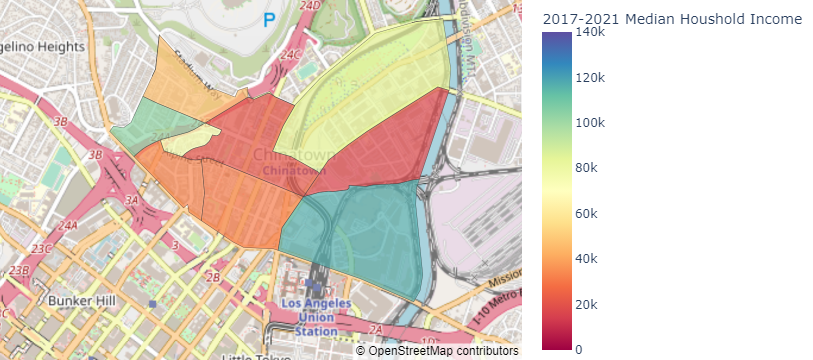

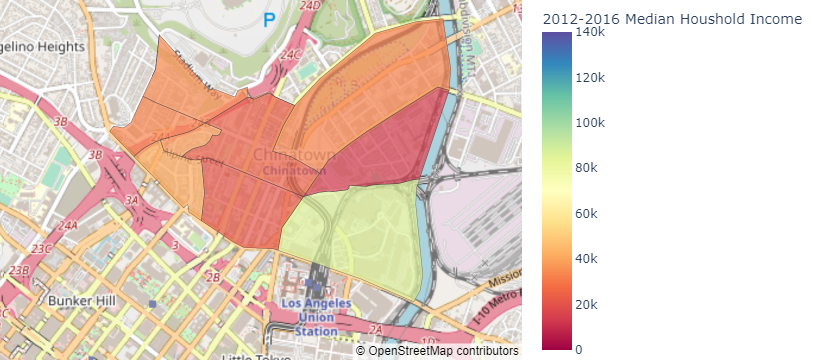

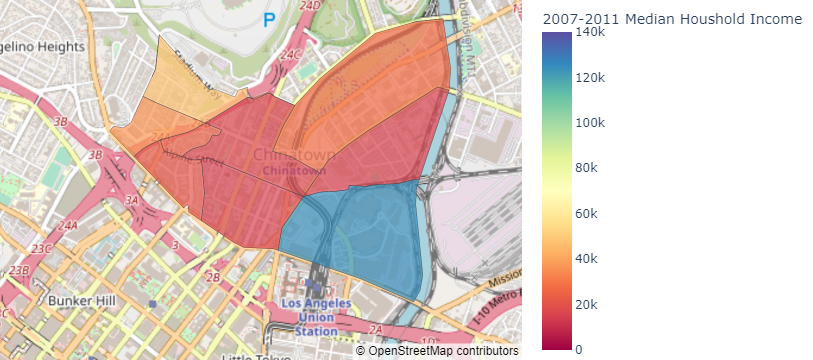

In [27]:
# Iterative loop to create maps using defined function

for period in medinc_years:
    medinc_fig(period)

#### Using Plotly to Create Interactive Maps - Median Household Income Percent Change from 2007 to 2021

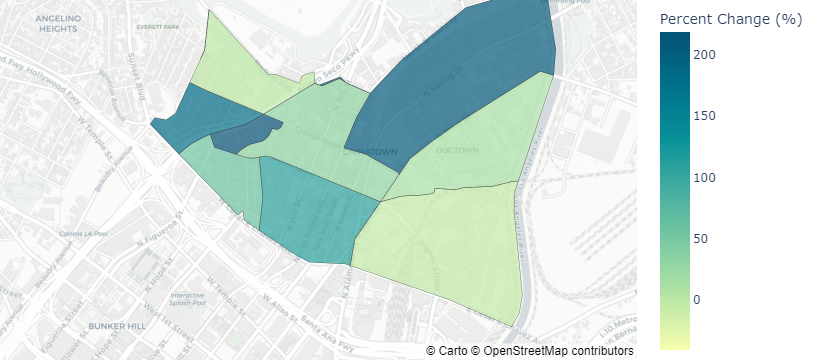

In [28]:
# Using plotly to create a chloropleth map of percent change in median household income by census block group

medinc_fig = px.choropleth_mapbox(chinatown_medinc, 
    geojson= chinatown_medinc.geometry, 
    locations = chinatown_medinc.index,
    color= '2007-2021 Median Household Income Percent Change (%)',
    color_continuous_scale="Bluyl",
    center = {"lat":34.0624, "lon":-118.239},
    zoom = 13.5,
    opacity = 0.7,
    mapbox_style = "carto-positron", # carto-positron OR open-street-map
    hover_data = ['2007-2011 Median Houshold Income','2017-2021 Median Houshold Income'],
    labels={'2007-2011 Median Household Income','2017-2021 Median Houshold Income'})
medinc_fig.update_geos(fitbounds="locations", visible=True)

medinc_fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
medinc_fig.update_layout(coloraxis_colorbar = dict(title='Percent Change (%)'))
medinc_fig.update_traces(marker_line_width=0.5)

medinc_fig.show()

### Rent Changes

## **Conclusion**